Import libraries

In [1]:
import pandas as pd
import numpy as np
from math import sqrt 
import matplotlib
import matplotlib.pyplot as plt

Latexify Code

In [2]:
# Original Author: Prof. Nipun Batra
# nipunbatra.github.io

SPINE_COLOR = 'gray'
def latexify(fig_width=None, fig_height=None, columns=1):
  """Set up matplotlib's RC params for LaTeX plotting.
  Call this before plotting a figure.
  Parameters
  ----------
  fig_width : float, optional, inches
  fig_height : float,  optional, inches
  columns : {1, 2}
  """

  # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

  # Width and max height in inches for IEEE journals taken from
  # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

  assert(columns in [1,2])

  if fig_width is None:
    fig_width = 3.39 if columns==1 else 6.9 # width in inches

  if fig_height is None:
    golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
    fig_height = fig_width*golden_mean # height in inches

  MAX_HEIGHT_INCHES = 8.0
  if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES

  params = {'backend': 'ps',
            'text.latex.preamble': ['\\usepackage{gensymb}'],
            'axes.labelsize': 8, # fontsize for x and y labels (was 10)
            'axes.titlesize': 8,
            'font.size': 8, # was 10
            'legend.fontsize': 8, # was 10
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            'text.usetex': False,
            'figure.figsize': [fig_width,fig_height],
            'font.family': 'serif'
  }

  matplotlib.rcParams.update(params)


def format_axes(ax):
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

  for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(0.5)

  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(direction='out', color=SPINE_COLOR)

  return ax

Function Definition

In [3]:
def bland_altman(csv_file_paths:list, column_names:list = ['x', 'y'], log_transform:bool = False, save_fig:str = None):
  """
  Function to create a Bland-Altman plot 

  Args:
    csv_file_paths: list of str
      File paths of the csv files containing the data. Each csv file should
      contain 2 columns - one for each method.

    column_names: list of str, default: ['x', 'y']
      Names to be used for the columns in the csv files. The first column is x
      and second column is y by default.

    log_transform: bool, default: False
      Whether to use log transformation (base 2) of the measurements before the 
      analysis 

    save_fig: str, default: None
      path to save image in, does not save if None

  Returns:
    None
  """
  fig, ax = plt.subplots()
  for k, path in enumerate(csv_file_paths):
    data = pd.read_csv(path, header=0, names=column_names)

    # use log transformation on data if log_transform is True
    if log_transform:
      data['x'] = np.log2(data['x'])
      data['y'] = np.log2(data['y'])

    averages = (data['x'] + data['y'])/2
    differences = data['x'] - data['y']

    # add the Bland-Altman plot to the figure
    ax.scatter(x=averages, y=differences, label=path.replace('.csv', ''), 
               color='C'+str(k))
    
    # add mean and +/- 1.96*SD lines only for the first file
    if k == 0:
      average_difference = differences.mean()
      sd_difference = differences.std()
      
      # add mean of the differences to the figure
      ax.axhline(y=average_difference,
                label='mean', color='k', alpha=0.8)
      
      # add mean + 1.96*SD of the differences to the figure
      ax.axhline(y=average_difference + 1.96*sd_difference,
                linestyle='dashed',
                label='+1.96SD', color='k', alpha=0.8)
      
      # add mean - 1.96*SD of the differences to the figure
      ax.axhline(y=average_difference - 1.96*sd_difference,
                linestyle=':',
                label='-1.96SD', color='k', alpha=0.8)
  
  # update titles, set legend, show, save
  ax.set_title('Bland-Altman Plot')
  ax.set_xlabel('Average of the 2 methods')
  ax.set_ylabel('Difference between the 2 methods')
  format_axes(ax)
  ax.legend(loc='upper center', ncol=2)
  plt.tight_layout()
  if save_fig is None:
    plt.show()
  else:
    plt.savefig(save_fig)


Test on random data

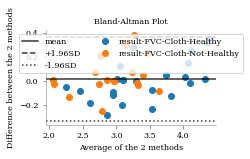

In [6]:
# for i in range(2):
#   x = np.sort(np.random.exponential(size=50))
#   y = np.sort(np.random.exponential(size=50))
#   pd.DataFrame({'x':x, 'y':y}).to_csv('exponential_%s.csv' %str(i), index=False)

latexify(columns=1)
# pass only one file name in the list if you only 
# want to plot one file in each figure
bland_altman(['result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv'], log_transform=False, save_fig='BlandAltman.png') 

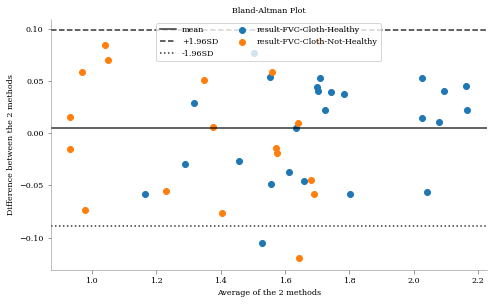

In [15]:
# won't plot points corresponding to negative values due to taking log
bland_altman(['result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv'], log_transform=True, save_fig='BlandAltman_log.png') 